# Case Study (Country_wide_COVID 19_Datasets)
The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.



# Problem Statement
My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)

We need to predict total deaths. So, it's an regression problem.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing/reading data files
worldmeter_df=pd.read_csv("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/COVID_19_Datasets-master/worldometer_snapshots_April18_to_May18.csv")
population_df=pd.read_csv("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/COVID_19_Datasets-master/population_structure_by_age_per_contry.csv")

In [3]:
print(worldmeter_df.shape)
print(population_df.shape)

(6603, 9)
(213, 4)


In [4]:
worldmeter_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [5]:
population_df

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [6]:
result_df=pd.merge(worldmeter_df,population_df,on='Country')

In [7]:
print(result_df.shape)
result_df.head()

(6603, 12)


,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154


In [8]:
result_df['Country'].value_counts()

Spain             31
Uganda            31
Sint Maarten      31
Niger             31
Oman              31
                  ..
USA               31
Czechia           31
Bermuda           31
Western Sahara    31
Iran              31
Name: Country, Length: 213, dtype: int64

# EDA (Exploratory Data Analysis)

In [9]:
result_df.describe()
# Total deaths and recovered cases have outliers, but we can't ignore them as few countries have much higher 
#   cases than world average.
# I will remove Date feature, as it's of much no use for now for prediction purpose.

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03,5456.000000,5456.000000,5456.000000
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03,0.276098,0.636109,0.087731
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04,0.106454,0.066359,0.062350
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.115000,0.472000,0.011000
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01,0.177000,0.596750,0.034000
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02,0.266500,0.649000,0.063500
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03,0.368250,0.675250,0.143250
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000


In [10]:
# Missing value analysis
result_df.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [11]:
result_df.dtypes

Date                         object
Country                      object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [12]:
# Missing value imputation in features containing null values.
# I will use median in this case, as higher values will give us higher mean for total cases and other related features.
# Which might not be true for small countries.
cols2_Impute=list(result_df.columns)
cols2_Impute.remove('Date')
cols2_Impute.remove('Country')
cols2_Impute.remove('Population')

for col in cols2_Impute:
    result_df[col]=result_df[col].fillna(result_df[col].median())

In [13]:
result_df.isnull().sum()
# We have succesfully imputed null values

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

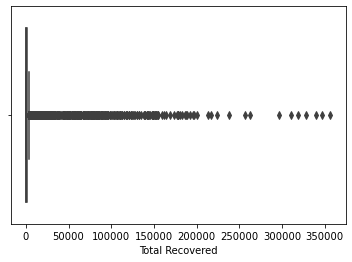

In [14]:
# Box Plot
sns.boxplot(result_df['Total Recovered'])

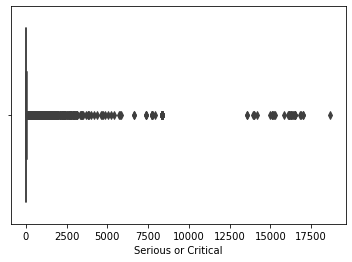

In [15]:
sns.boxplot(result_df['Serious or Critical'])

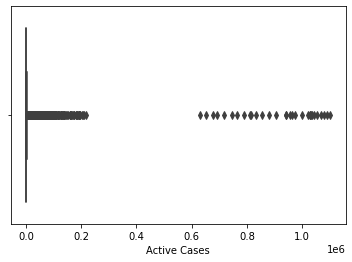

In [16]:
sns.boxplot(result_df['Active Cases'])

In [17]:
# Observation
# We have outliers, still I am not going to remove them as few countries actually have higher cases than usual.

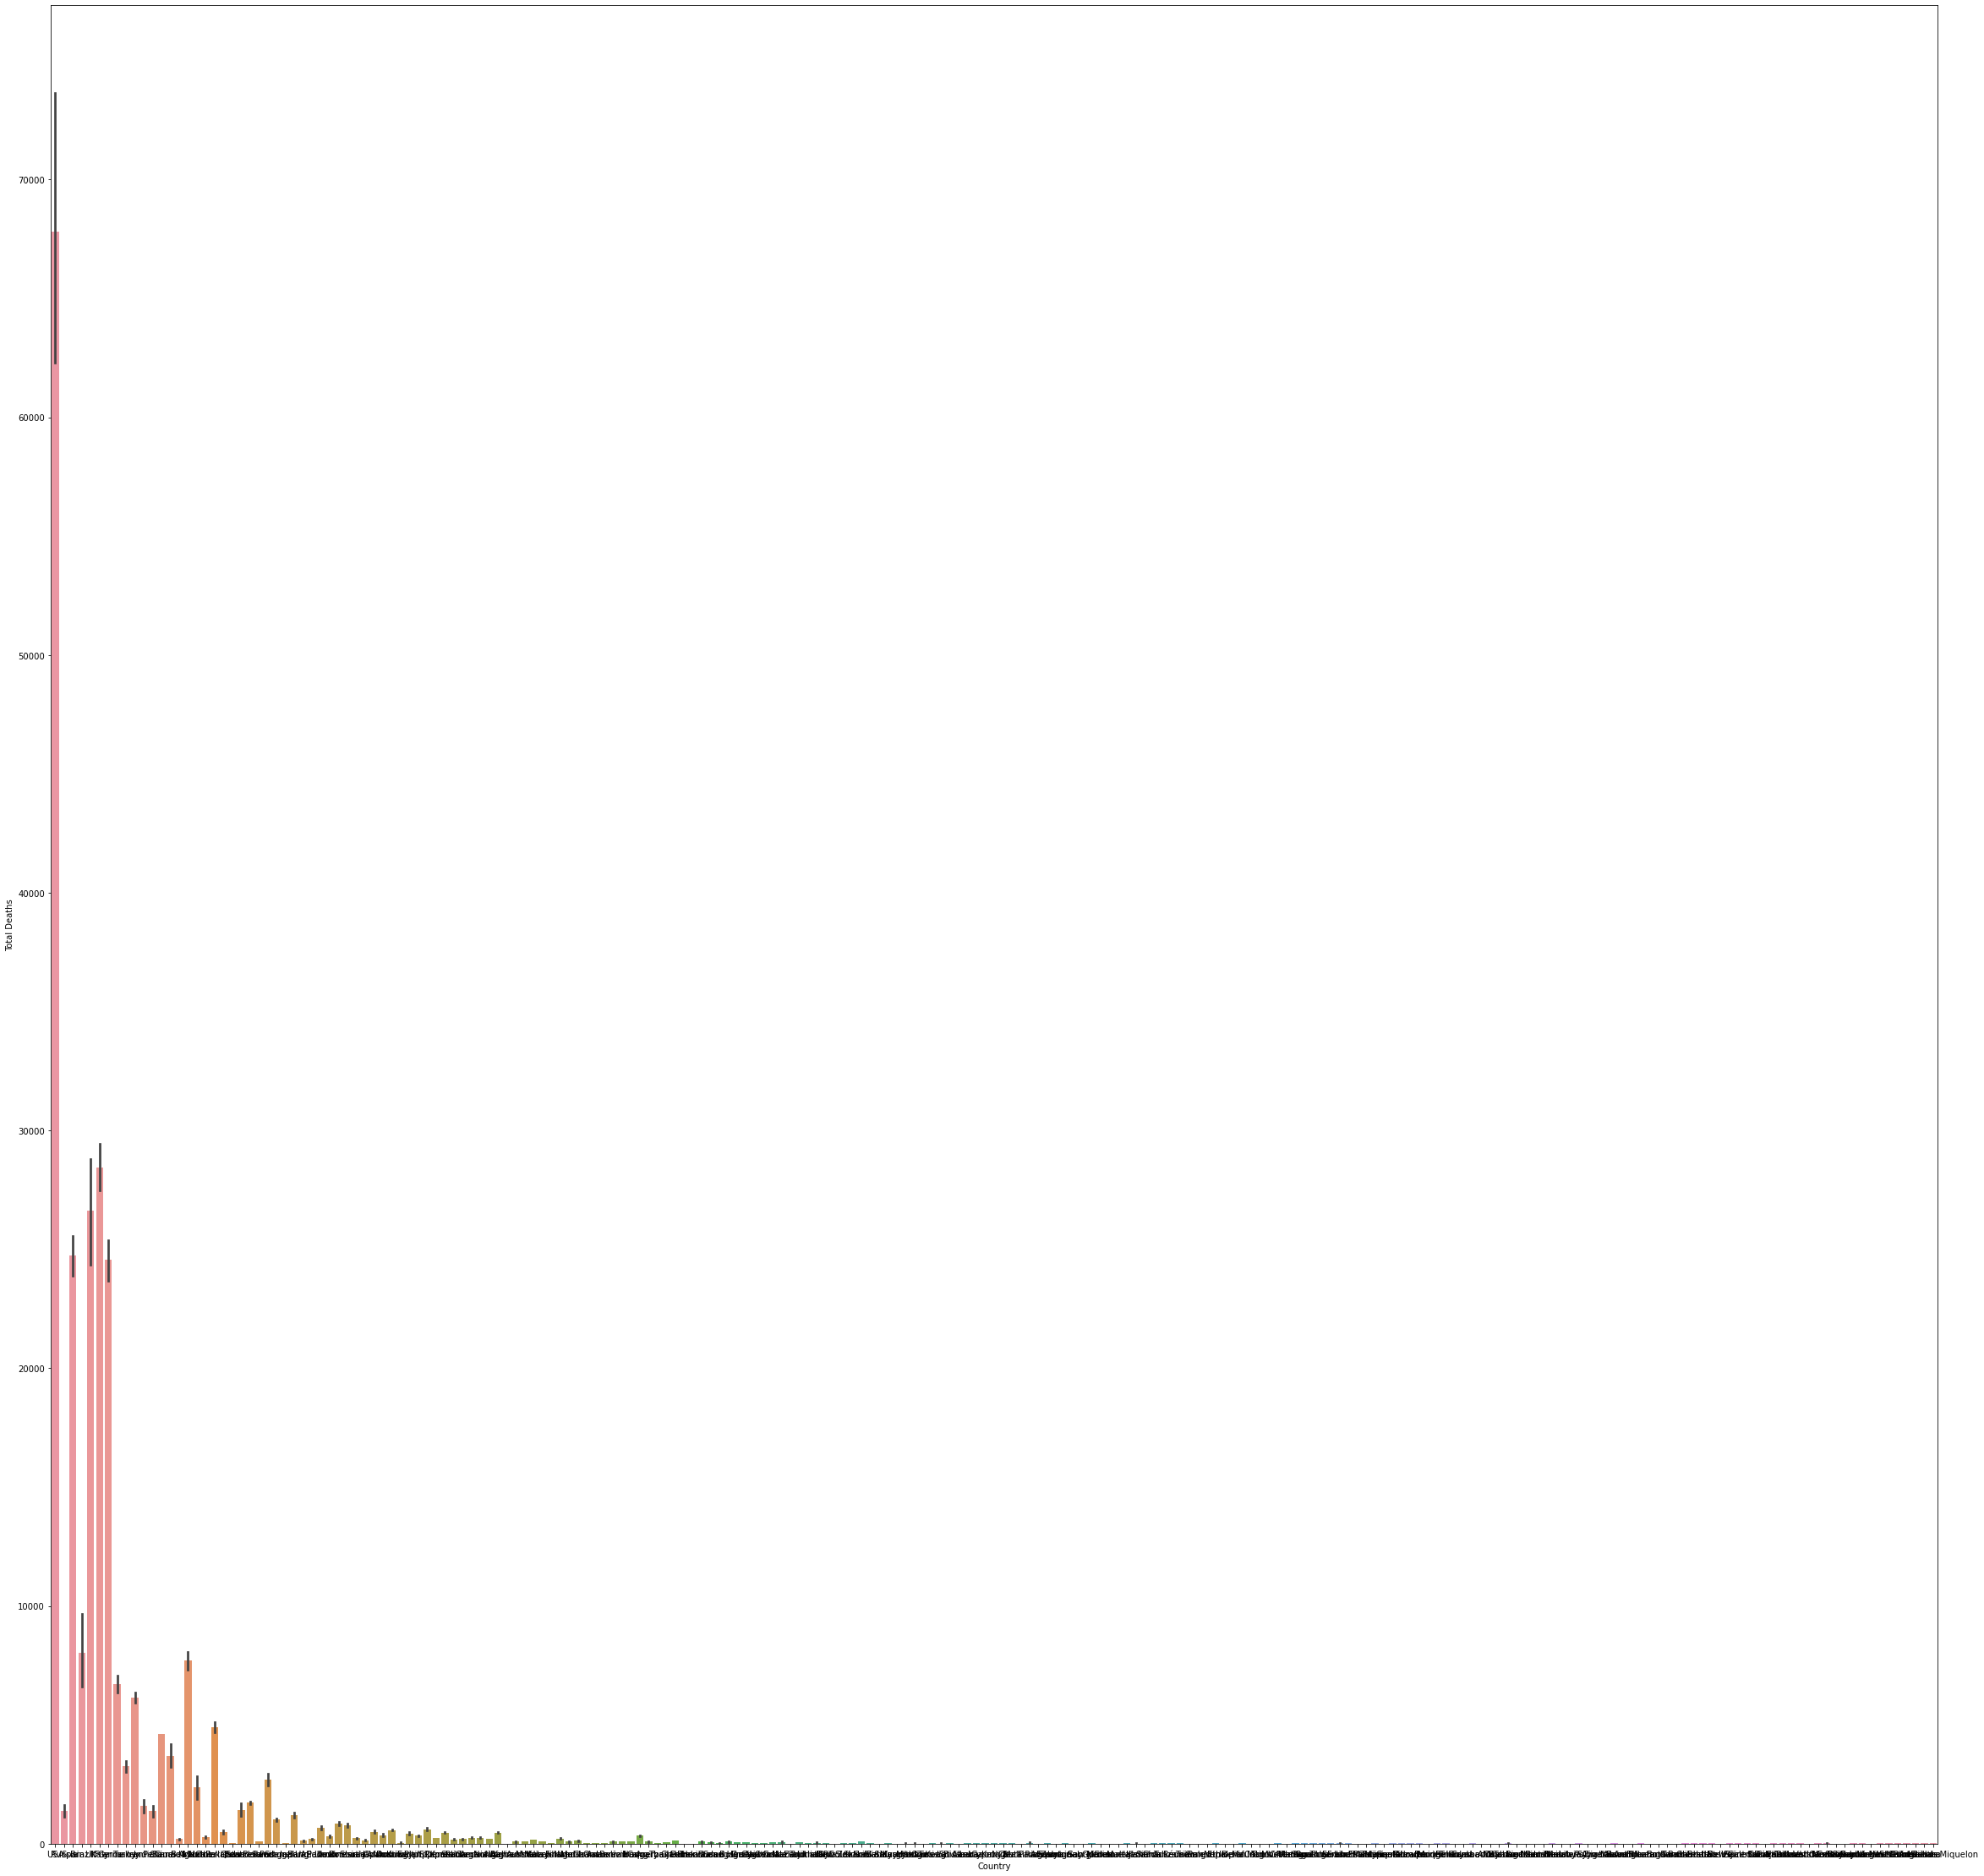

In [18]:
# Barplots
plt.figure(figsize=(40,40))
sns.barplot(x='Country',y='Total Deaths', data=result_df)
# As expected few countries have higher no.of deaths as no. of cases are higher in them.

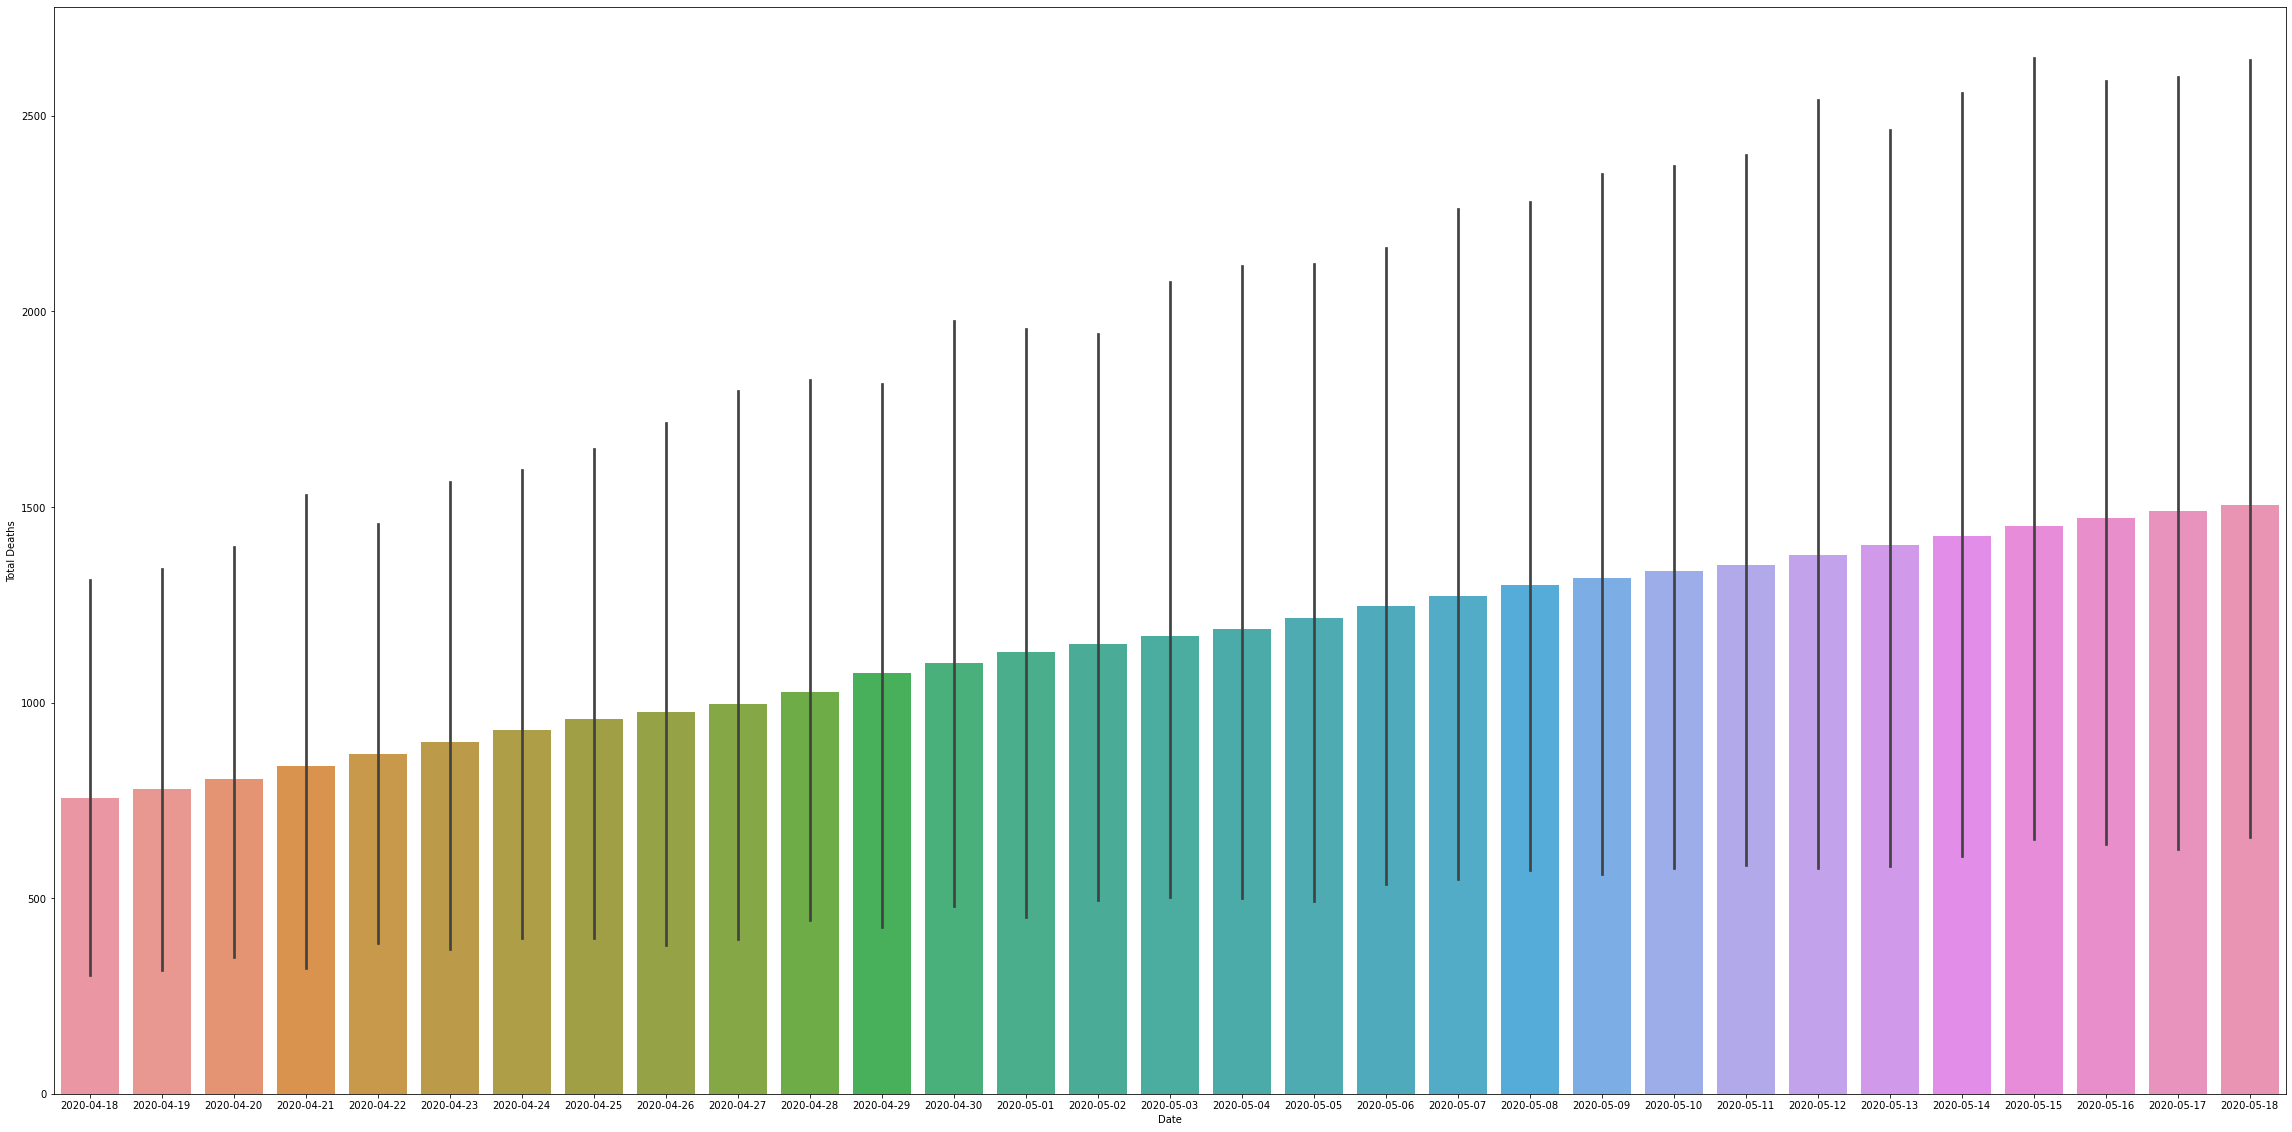

In [19]:
plt.figure(figsize=(40,20))
sns.barplot(x='Date',y='Total Deaths',data=result_df)
# Total deaths are increasing with time, in the provided data

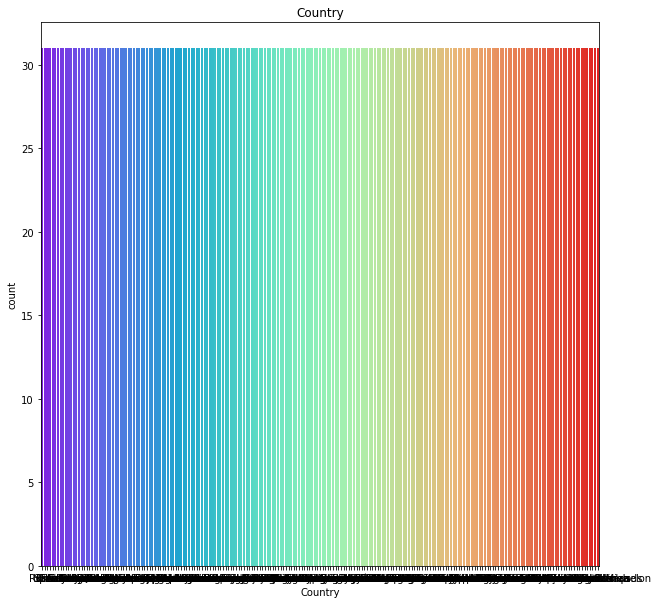

In [20]:
# Countplot
plt.figure(figsize=(10,10))
sns.countplot(x='Country',data=result_df,palette='rainbow')
plt.title('Country')
plt.show()
# No difference as expected

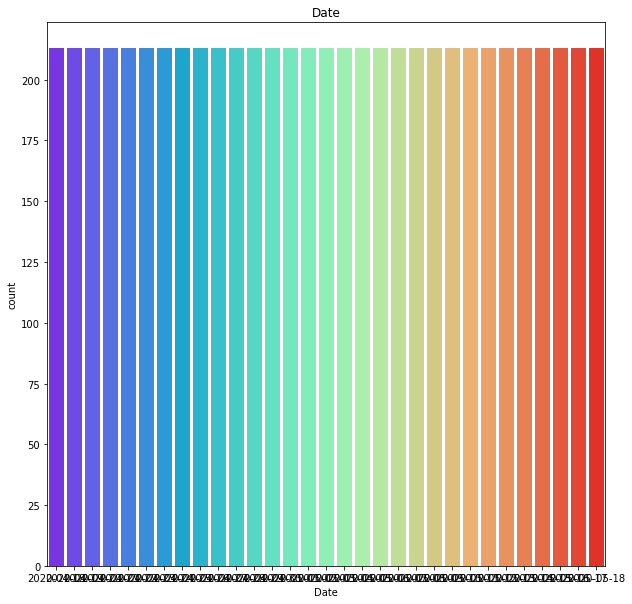

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='Date',data=result_df,palette='rainbow')
plt.title('Date')
plt.show()
# No difference as expected

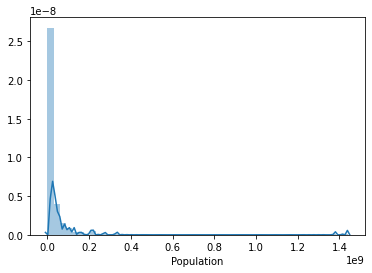

In [22]:
# Distribution plots
sns.distplot(result_df['Population'])
# Right skewed

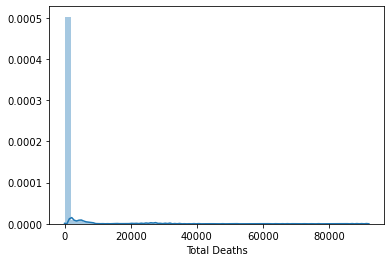

In [23]:
sns.distplot(result_df['Total Deaths'])

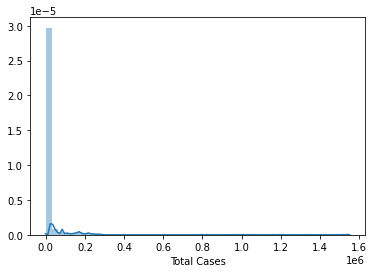

In [24]:
sns.distplot(result_df['Total Cases'])
# Total Deaths and Total Cases are highly correlated. 

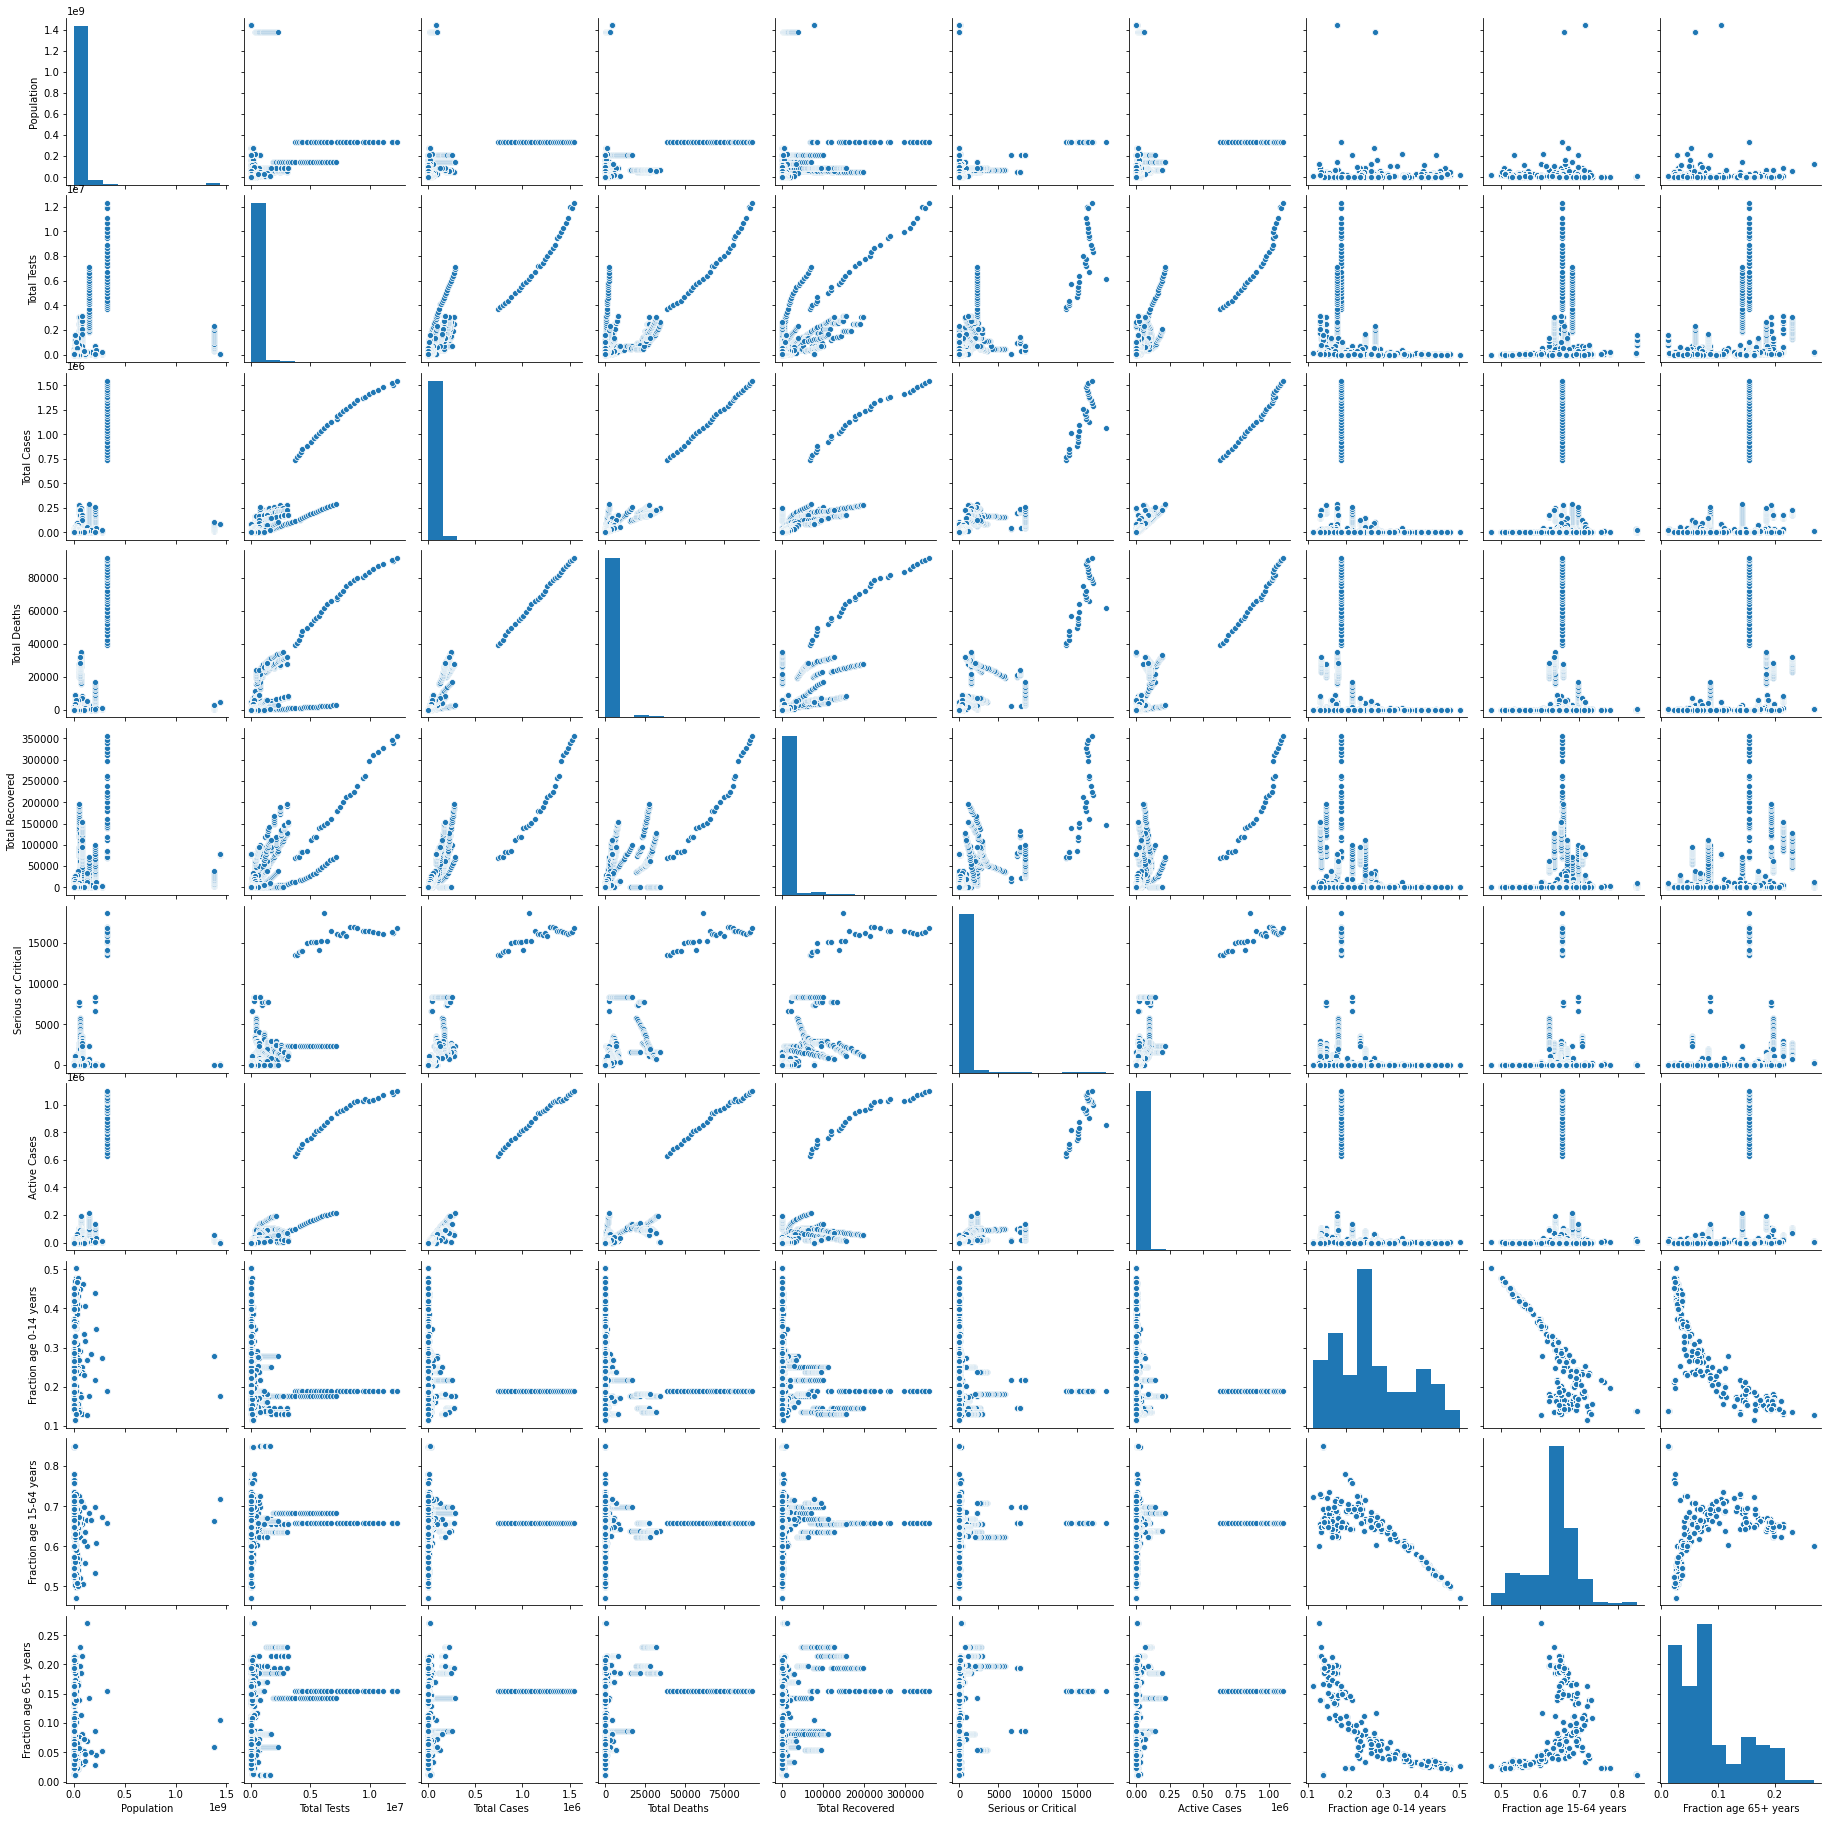

In [25]:
# Pairplot
sns.pairplot(data=result_df)

In [26]:
# Dropping Date feature and the creating heatmap of corrmatrix
result_df.drop('Date',axis=1,inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
# Encoding
result_df['Country'] = LabelEncoder().fit_transform(result_df['Country'])

In [28]:
result_df

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.1890,0.657,0.1540
1,201,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.1890,0.657,0.1540
2,201,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.1890,0.657,0.1540
3,201,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.1890,0.657,0.1540
4,201,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.1890,0.657,0.1540
...,...,...,...,...,...,...,...,...,...,...,...
6598,165,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635
6599,165,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635
6600,165,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635
6601,165,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635


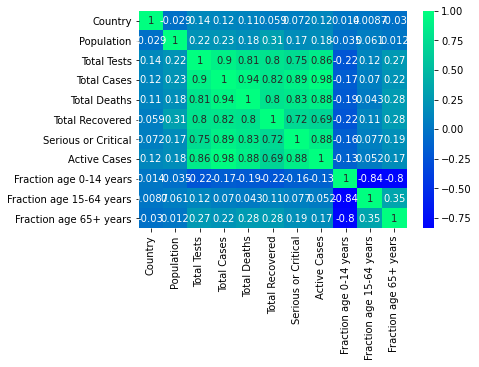

In [29]:
corr_mat=result_df.corr()
sns.heatmap(corr_mat,annot=True,cmap='winter')

## Feature Selection

In [30]:
cols2Remove=['Total Cases','Total Tests']
for col in cols2Remove:
    result_df.drop(col,axis=1,inplace=True)

In [31]:
result_df.head()

,Country,Population,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201,330774664,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,201,330774664,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,201,330774664,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,201,330774664,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,201,330774664,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154


# Model Selection


In [32]:
Y=result_df['Total Deaths']
X=result_df.drop('Total Deaths',axis=1)

In [33]:
print(X.shape)
print(Y.shape)

(6603, 8)
(6603,)


In [34]:
# Normalization
colList=list(X.columns)
colList.remove('Country')
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [35]:
X.head()

,Country,Population,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201,0.229812,0.191558,0.725763,0.573094,0.191214,0.489418,0.552124
1,201,0.229812,0.199230,0.726567,0.591940,0.191214,0.489418,0.552124
2,201,0.229812,0.203119,0.747188,0.615153,0.191214,0.489418,0.552124
3,201,0.229812,0.232677,0.750670,0.626631,0.191214,0.489418,0.552124
4,201,0.229812,0.235840,0.750670,0.650684,0.191214,0.489418,0.552124


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# Calculating root mean squared log error.
def rmlse(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [38]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=LinearRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=r2_score(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print("Best r2_score Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Linear regression is giving r2_score 92 at random state 70

Best r2_score Score is 0.9245888566030398 for random state 70.


In [39]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=DecisionTreeRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=r2_score(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print("Best r2_score Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Decision Tree Regressor is giving r2_score 99 at random state 47

Best r2_score Score is 0.9992418852203528 for random state 56.


In [40]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=AdaBoostRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=r2_score(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best r2_score Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# AdaBoost Regressor is giving r2_score 98 at random state 97

Best r2_score Score is 0.9833145942973874 for random state 70.


In [41]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=GradientBoostingRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=r2_score(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best r2_score Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# GradientBoosting Regressor is giving r2_score 99 at random state 70

Best r2_score Score is 0.9979261482165176 for random state 70.


In [42]:
# Gradient Boosting Classifier is giving best result. Let's deploy it after checking it's cross val score.
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300]}
gbr=GradientBoostingRegressor()
gsgb=GridSearchCV(gbr,parameters)
gsgb.fit(X,Y)
print(gsgb.best_params_)

{'criterion': 'mae', 'n_estimators': 100}


In [43]:
from sklearn.model_selection import cross_val_score
# Gradient Boost Algorithm is giving us the best result with 99% accuracy, let's use corss validation and later prepare our final model.
cross_val_score(GradientBoostingRegressor(),X,Y,cv=5,scoring="r2").mean()
# It's a low score, model is not suffering from over or under fitting.

-634.7606414519717

In [47]:
# Max random state is coming around 90 and best model came out to be Gradient Boodting. We will create final model around that.
gbm=GradientBoostingRegressor(criterion='mae',n_estimators=100)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=70,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)

In [48]:
# Checking error and accuracy
print("r2_score is ",r2_score(pred,y_test))

r2_score is  0.9975825441542719


In [49]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_COVID.pkl')

['GradBoost_COVID.pkl']